## BPNet TF-MoDISco report

In [1]:
modisco_dir = "/users/avsec/workspace/basepair/data/processed/chipnexus/exp/models/oct-sox-nanog-klf/models/n_dil_layers=9/modisco/valid/new-hparams"

In [2]:
from bpnet.modisco.files import ModiscoFile
from bpnet.cli.contrib import ContribFile
from bpnet.utils import read_json
from bpnet.plot.vdom import vdom_modisco
from kipoi.readers import HDF5Reader
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from plotnine import *

/users/avsec/bin/anaconda3/envs/chipnexus/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/users/avsec/bin/anaconda3/envs/chipnexus/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
mf = ModiscoFile(f"{modisco_dir}/modisco.h5")

In [ ]:
cf = ContribFile.from_modisco_dir(modisco_dir)

id_hash = cf.get_ranges()[['interval_from_task', 'idx']]
id_hash.columns = ['peak_id', 'example_idx']

tasks = cf.get_tasks()

# row = example_idx
total_counts = pd.DataFrame({task: v.sum(axis=-1).sum(axis=-1)
                             for task,v in cf.get_profiles().items()
                              })

In [80]:
# get all seqlet instances + annotate them with example_idx
dfp = mf.seqlet_df_instances().rename(columns=dict(seqname="example_idx"))
dfp = pd.merge(dfp, id_hash, on="example_idx")

In [18]:
len(mf.pattern_names())

84

In [ ]:
# total number of seqlets
len(dfp)

In [19]:
# Number of metaclusters
len(mf.metaclusters())

13

### Number of seqlets per pattern

In [20]:
mc_stat = mf.metacluster_stats()

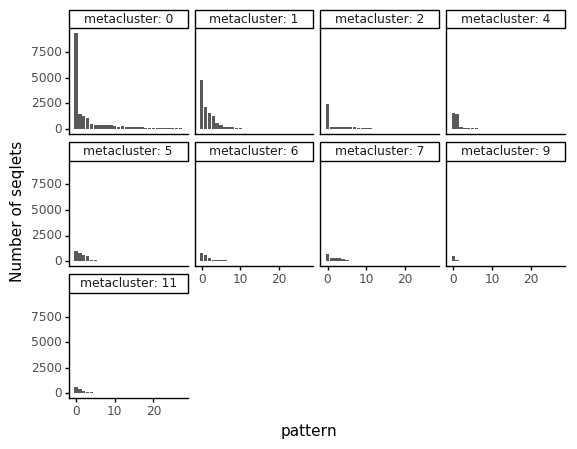

<ggplot: (8773812555703)>

In [21]:
ggplot(aes(x="pattern", y='n'), mc_stat) + geom_bar(stat='identity') + \
    facet_wrap("~metacluster", ncol=4, labeller='label_both') + \
    ylab("Number of seqlets") + theme_classic()

### Zoom-into the 500 seqlet range

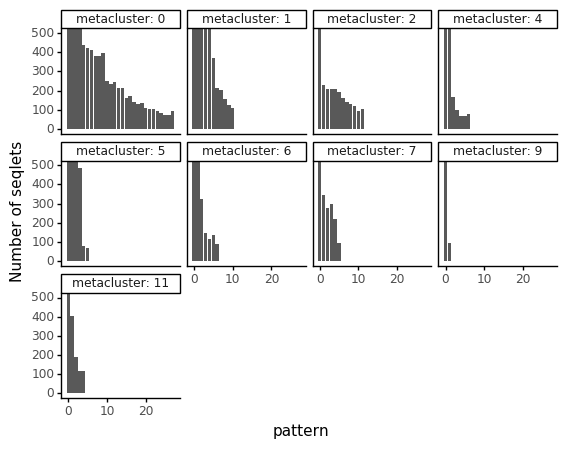

<ggplot: (8773812680361)>

In [22]:
ggplot(aes(x="pattern", y='n'), mc_stat) + geom_bar(stat='identity') + \
    facet_wrap("~metacluster", ncol=4, labeller='label_both') + \
    ylab("Number of seqlets") + theme_classic() + coord_cartesian(ylim=[0, 500])

## Important tasks per metacluster

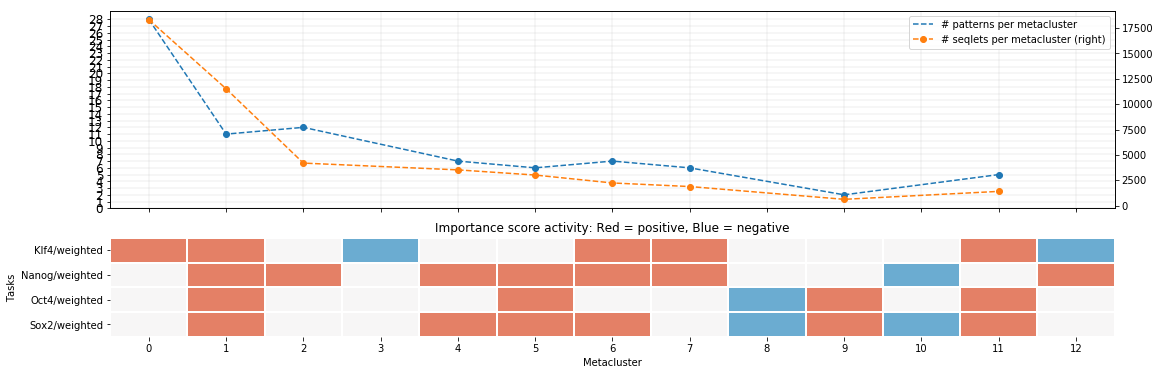

In [23]:
mcs_grouped = mc_stat.groupby("metacluster").n.agg(["count", "sum"]).reset_index()
fig, ax = plt.subplots(2, 1, sharex=False, figsize=(18,6), 
                       gridspec_kw={'height_ratios': [2,1]})
mcs_grouped.plot("metacluster", "count", 
                 label="# patterns per metacluster", style="o--", 
                 ax=ax[0], 
                 yticks=range(mcs_grouped['count'].max()+1),
                 xticks=range(38),
                 fontsize='large',
                 xlim=(-.5, len(mf.metaclusters()) - .5 ))
mcs_grouped.plot("metacluster", "sum", 
                 label="# seqlets per metacluster", 
                 style="o--", ax=ax[0], secondary_y=True)
ax[0].grid(linewidth=0.2)
mf.plot_metacluster_activity(ax[1], cbar=False)
ax[1].set_title("Contribution score activity: Red = positive, Blue = negative");

In [69]:
vdom_modisco(mf, "plots", total_counts, dfp, is_open=True, trim_frac=0.08, letter_width=0.15, height=0.5)

<div><details open><summary><b>metacluster_0</b>, # patterns: 12, # seqlets: 8369, important for: <b>Klf4,Nanog,Oct4,Sox2</b></summary><ul><li><details><summary>pattern_0: # seqlets: 3675<img src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAALYAAABGCAYAAABhYm4dAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1%2B/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMi4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvhp/UCwAAEjdJREFUeJztnXt4FNXdxz%2BzO3vLPYFkk5AgREFENIYgiFwkbVUsolV5Xry1L1Xr4w1b7duXClovfbUvpRVK0betotbWKghUWlErV%2BUSQKASCCQQyCbkspvrJnudvcy8f0yysCQgiUmUdT7PM89OzvzmzJnDd86cc36/MwiKoihoaMQYuq%2B6ABoa/YEmbI2YRBO2RkyiCVsjJtGErRGTaMLWiEk0YWvEJJqwNWISTdgaMYn4VRfgm0Kbvw0FhQRjAqJOq/b%2BRmuxB4CPKj4iZWEKGYsymLVy1lddnG8EmrAHgPfK3gMgKAfZW7/3Ky7NNwPtnfglaWiAdeugrg6sVrj%2BesjNjbYpayqL7DvcDhRFQRCEAS7pNwtN2L1EUWDxYnjySdDpwOsFiwVkGebMgSVLwGRSbaucVZHzdIKOJm8T6fHpasK5CtxqBbu9b28ihtG6Ir1k0SJ46inw%2BcDjUYXu9YLfD2%2B8AfPnq3aKomD32Hnx%2BhdpndeKSTRhc9p6fkGHoy%2BLH/Nowu4FpaXwzDOqkLvD74fGRnXf6XciyzKFWYWkmFNQFKV3wtboEVpXpBf89KeqeAHi4iA7G6ZOhd274fjxaMFXtVVhNpgx6dV%2BiT/k14Q9AGgtdg%2BprYUtW9Suh9EI3/oWlJXB8uVw4AAsW6baVVerv50ithgsAMiKTHlz%2BckMrdboC3R2zDt/z2SncVa0FruHrF6tDhZB/V2%2BHPT6k8d/%2BENV/CNGqH/bnDb8IT8Z8RkAZCVmUd50irBPHxB2DiYlSX16NHqFJuwesmaNOmAEmDwZMjK62jz55Mn98qZyAuEAgyyDcEkucpNyqWqr6nqSRp%2BidUV6gKLAvn3qflwczDoHJ2J5cznpcemElTCyIpObnEuDpwFtDXX/orXYPaCxEQIBdV8UoaDgi8%2BxOW3kJucihSTMopncJNV70%2BJrYVDcoH4sbf9Q4iihrKmMFHMK1%2BZde0ZH04ZjG/ik6hPiDHH85KqfRMYYA4Um7B5w7Jg6ppMktTty8cVffI7dbedy6%2BUAmEQTF6ZdGJnLPt%2BEXeWsIv8P%2BSQaEwnKQYrvLeaKzCu62DV5m7j2r9cCYBbNjMkYw8yLZw5oWbWuSA%2Boq4v%2BOynp7PZOv5OQHCI3OReD3gDAiLQRoHBeTvkV1xSTaEzEFXAhILDjxI5u7XbV7CLJpFaOFJLYWr11IIsJaMLuEc3NEAyq%2B0lJX%2BwNr3JWYRbNDEseRpwhDoChyUPxhXxUOiv7ubR9z2bbZsJKGOVpNfx2Y%2BXGbu22Vm/FF/ChPK0wLnscG493b9effP2ELQjntmVmDnjRXC4IhdT906eZu6OqrQpBEBg5aGQkzRpvJSgHOdp8tJ9K2X9srtwc6XoUZheyo7r7Fnvj8Y2MHKze8%2BXWyyltLCUshwesnPB1FPa5Oiy%2BAgIBCHf8%2BxiNX2xvc9qQQhLDUoZF0hKMCRj1xqiIv/MBX9CHzWljXPY4AK7MvpIWfwuNnsYou7Ac5mDjQQqzCwGYlDsJo95IaWPpgJb36ydsu12dV%2BvcJElN73RYdG5fQaRbOHzSZ3KqU%2BZMHGk%2BghSWyErMiqT5Qj6GJA457%2Bay99TtwWKwcM0F1wBQNKwIs2hmZ83OKLvDTYcRdSJX51wNwNW5VxNWwl3s%2Bpuvn7C/xojiSa9jZ1/7bJQ1laETdKSYUyJpnYNJu9t%2BXs1l7zixA3/Iz/gh4wG4IvMKXJKLT6s/jbLbWbMTWZGZPHQyAMNThxMIB87YH%2B8vNGH3ALP5ZEt9LsKudFaSmZBJIByIpOkEHblJuSgotPpb%2B6mkKrXttcx4awYTXp3A7FWzv1Q/9%2BPjH2PSmyKhARaDhcyEzC4Dw43HNyKFJC5KuwhQg74uTb%2BU7dXbe38jvUATdg9ITgaDOmuHx/PF9na3HYtowaAz4JJcuCQXZtGMSTRhFs1RCxD6g/mb5rOnfg8Tcyay7sg63j30bq/yURSFPXV7KMgqwBtUQxelkERhdiGljaWE5FDEdtuJbYwaPCryMOsEHYXZhTR4Gmj19e%2BDfCqasHtAevrJFtvtVlfLnIl2qZ1AOMCx1mPkLc2j4I8FFPyxgNEvjeb1f78O9O9cdp2rjpWlK3l0/KMsmb6E/Mx8Fmxa0Kvuj81pIxgOMi57HGbRDEC8MZ7xQ8Zj0psocZQA6ry9w%2B2IDBxBHSxPzp2MxWBhd%2B3uvrm5cyD2hX2u04edk9KKDO1Hof5jqF4F1avBvgFcx8jNkSODR5MJ6uvPfNkqZxUWUXUj17TXcKz1WGRTUPo9LvuFrS8g6kQeGf8IsiKzYMoCGjwNrDu6rsd5FdcUo9fpmXbBtIiwRZ3ItAumEZSDEUfNZ7WfYTFYmJQ7iURTYuT8q3OvxhPwsP3EwHVHYt%2BlfnoLdapX5dRjUjPsfhAq34Rw90tjLpRS8PlaAAGjUV1JM2RI95e1OW1nXbAbCAei47L7kGZvM6/9%2BzVmjZ6FTtChE3QUDSsizZLGExueYMaIGT1aTLzZthl3wE2Lr4U2f1skvcnXhD/kZ8PxDTwy/hG2n9iON%2BDFG/TiDrhP2nmbCCthNhzfwHNFz0XSXZKLe/5xD4caDiHqRJZMX0LR8KI%2BqYPzV9h9uQhWaoZ1Y9RfgNSxMPz7EJcDCOB3QONWEpwHGDxYzc7rhW3b4Lrrus%2Bycw470ZhIQWZBZMovLIdZW76WoBzst7ns3xb/FkVReGLyE5GW06g3Mnf8XJ7Z8gyfVH3CtGHTzjm/LbYtAMxZOwfWdj1eXFMMwPrj6wkpIR7712M89q/Hutjtd%2BxHVmR0go5AOMD0t6YjyzKlD5eydNdSZr49k233bOs2/qSnnL/CtlqjF7h2Rid1/vaEilch0ApKENLGwfW71QfHUw329aA3QeZ3IPM7XDNZYsUqM8EgvPMOPPdc1%2BwUBY62HEUKS5hEE4unL2Zs1tiOYwqW59UuSn/MZbdL7SzdtRR/2M8LW18g35ofObb68Go8QQ9PbHiC4vuKzyk/T8ATGeSa9eaowK0WXwu%2BkI82fxsOt4PP7Z8Dajcl0XiyK%2BINepHCEgICR5qPMHLQSG5fdTt2l53dP1L73fcW3Mu%2B%2Bn0U/bmIvffvJS8170vVw/nbx%2B5LR47UCHLH%2BQkXnXwblDwNu%2B7r2O6H3Q9y2/i/k9jxb1ZbC59GT%2BMSCqnTgu9sUFtjKSSRk5QTOS4IQuTTC3Z33zuZlu1ehqIoJBgSsBgsmERTZFNQEBAocZSccSAny9GD4k7HjIDAIxMeoebxmsi2YMoCRJ2ISTSx%2BvBqBNR6u2XULbTMa4lsS6YviYw3ik8UM/eDuXxY8SFFw4siD0q8MZ654%2BfS5m9jymtTaPA0fKl6GPAWW1Zktldvp9JZiV7QM2PkjCgHRn8SkkPd33DubXD0/9S%2Bde1asL0NOTdB4Ysw/C6w/U3dZIkZk8sibnWvV11ssH495OerC3nnzFFd7z6zGuQ

Metaclusters heatmap


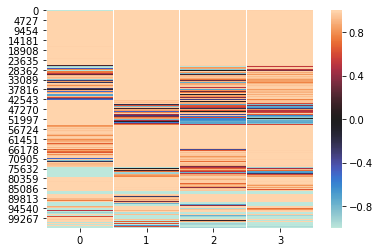

In [14]:
print("Metaclusters heatmap")
import seaborn as sns
activity_patterns = np.array(mf.f.f['metaclustering_results']['attribute_vectors'])[
                    np.array(
        [x[0] for x in sorted(
                enumerate(mf.f.f['metaclustering_results']['metacluster_indices']),
               key=lambda x: x[1])])]
sns.heatmap(activity_patterns, center=0);